# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola levando à nota zero na prova
- Renomear o notebook para NOME_SOBRENOME_MATRICULA
- Enviar o arquivo .ipynb na tarefa do TEAMS.

# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justificando as falsas

1- O formato GIF surgiu como uma evolução do formado PNG, uma das suas vantagens é a possibilidade de representar muito mais cores.

Falso.
O formato GIF surgiu antes do PNG e só suporta até 256 cores. O PNG é que é uma evolução do GIF.

2- Métodos de compressão sem perdas são aqueles que permitem a restauração da informação original em sua totalidade, normalmente as perdas são irreversíveis.

Falso. Compressão sem perdas permite sim recuperar toda a informação original, e não possui perdas irreversíveis.

3- A compressão com perda deve ser utilizada somente em contextos em que a perda de dados não é importante (exemplos: imagens médicas e documentos de texto).

Falso. Compressão com perdas não deve ser usada em imagens médicas ou textos, pois a integridade dos dados é importante nesses casos.

4- Quantização consiste em mapear valores de entrada em um conjunto menor de saída (e.g.: arredondamento e truncamento)

Verdadeiro.

5-  A audição humana escuta ondas entre 20Hz e 20kHz, uma frequência comum é 44,1kHz

Verdadeiro.

# Parte Prática

## Material de Apoio

### Importações
```
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
from PIL import Image
```matplotlib.pyplot as plt
```

### Histograma
```
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

```

### Manipulação de imagens

```
(l,c,p) = img.shape
plt.imshow(imagem)
```

### Forçando uma imagem de uma página para 3 páginas
```
  imagem_3p = np.zeros(shape=(l,c,p),dtype=np.uint8)
  imagem_3p[:,:, 0] = frame_1p
  imagem_3p[:,:, 1] = frame_1p
  imagem_3p[:,:, 2] = frame_1p
```

### Detecção de bordas
```
    imagem_grey = np.average(frame, axis=2).astype(np.float64)
   
    abs_tg_c = np.abs(np.diff(imagem_grey.astype(np.float64), axis=0, append=255))
    abs_tg_l = np.abs(np.diff(imagem_grey.astype(np.float64), axis=1, append=255))
    abs_tg = np.sqrt(abs_tg_c ** 2 + abs_tg_l ** 2)

    imagem_border = np.zeros(shape=(l, c), dtype=np.uint8)
    imagem_border[abs_tg > threshold] = 255
```

### Manipulação de vídeo
```
video = mpe.VideoFileClip("video.mp4")
frame = video.get_frame(2 / video.fps)
frame = video.get_frame(2)
video.ipython_display(width=480)
video_modificado = video.fl_image(func_modificar)
subclip = video.subclip(0,2)
subclip = video.subclip(3)
parts = mpe.concatenate_videoclips([part1, part])
video.write_videofile('video.mp4')
```
### Manipulação de aúdio
```
fs, data = wavfile.read("nome.extensão")
sd.play(data, fs)
wavfile.write("nome.extensão", fs, parte)
```

### Conversão CM|Y
```
img_cmy = 255 - img_rgb
```

### Reflexão utilizando numpy
```
    img_refl = np.zeros(shape=imagem.shape, dtype=np.uint8)
    img_refl[::1, ::-1] = imagem
```

------------------------------------------------------------------------------------------

**1 -** Abra o vídeo "boydancing.mp4" e salve-o em uma variável, pegue o **frame do indice 4** e o exiba.

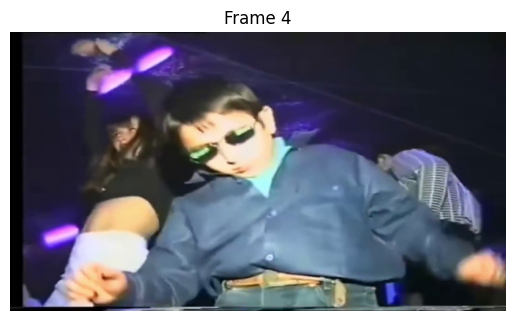

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
from PIL import Image

from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.audio.io.AudioFileClip import AudioFileClip
from moviepy.video.compositing.CompositeVideoClip import CompositeVideoClip

#Abindo video
video = VideoFileClip("boydancing.mp4")
frame_4 = video.get_frame(4)
plt.imshow(frame_4)
plt.title("Frame 4")
plt.axis("off")
plt.show()



**2 -** Carregue o áudio **GPdaZL.wav** presente pasta e reproduza-o.

In [ ]:
#Carregando áudio e reproduzindo com sounddevice
sr, audio_data = wavfile.read("GPdaZL.wav")
if audio_data.ndim == 2:
    audio_mono = audio_data.mean(axis=1).astype(np.int16)
else:
    audio_mono = audio_data
sd.play(audio_mono, sr)


**3 -** Crie uma função que receba um frame e retorne um frame refletido em x e y, aplique essa função no vídeo e observe o resultado.

In [ ]:
from moviepy.video.VideoClip import VideoClip

def make_reflected_frame(t):
    frame = video.get_frame(t)
    return np.flipud(np.fliplr(frame)).astype(np.uint8)

video_refletido = VideoClip(make_reflected_frame, duration=video.duration)

video_refletido.write_videofile("refletido.mp4", fps=video.fps, codec="libx264")

MoviePy - Building video refletido.mp4.
MoviePy - Writing video refletido.mp4



MoviePy - Done !
MoviePy - video ready refletido.mp4


**4 -** Crie uma função que receba um frame e realize a detecção de bordas nele com **treshold de valor 10**, aplique essa função no vídeo e observe o resultado. **Sua função deve retornar um frame com 3 páginas para evitar problemas**.

In [ ]:
from moviepy.video.VideoClip import VideoClip

def detectar_bordas_frame(t):
    frame = video.get_frame(t)
    img_gray = Image.fromarray(frame).convert("L")
    img_arr = np.array(img_gray).astype(np.float64)

    diff_v = np.abs(np.diff(img_arr, axis=0, append=img_arr[-1:,:]))
    diff_h = np.abs(np.diff(img_arr, axis=1, append=img_arr[:,-1:]))

    magnitude = np.sqrt(diff_v**2 + diff_h**2)
    threshold = 10
    bordas = np.zeros_like(img_arr, dtype=np.uint8)
    bordas[magnitude > threshold] = 255

    bordas_rgb = np.stack([bordas]*3, axis=-1)
    return bordas_rgb.astype(np.uint8)

video_bordas = VideoClip(detectar_bordas_frame, duration=video.duration)

video_bordas.write_videofile("bordas.mp4", fps=video.fps, codec="libx264")


MoviePy - Building video bordas.mp4.
MoviePy - Writing video bordas.mp4



MoviePy - Done !
MoviePy - video ready bordas.mp4


**5 -** Crie uma função que receba um frame e retorne esse frame convertido para o espaço de cor CMY

In [ ]:
from moviepy.video.VideoClip import VideoClip

def converter_cmy_frame(t):
    frame = video.get_frame(t)
    cmy = 255 - frame
    return cmy.astype(np.uint8)

video_cmy = VideoClip(converter_cmy_frame, duration=video.duration)

**6 -** Separe o vídeo original em 3 subclips:
- Segundos 0 ao 2: Aplicar conversão para cmy
- Segundos 2 ao 4: Aplicar reflexão no eixo x e y
- Segundos 4 em diante: Aplicar detecção de borda

**Una esses clips em um único vídeo, exiba o resultado e, por fim, salve com o nome "littleboy".**

In [ ]:
duration1 = 2
duration2 = 2
duration3 = video.duration - 4
total_duration = duration1 + duration2 + duration3

def frame_func(t):
    if t < duration1:
        return (255 - video.get_frame(t)).astype(np.uint8)  # clip1: CMY
    elif t < duration1 + duration2:
        t2 = t - duration1
        frame_orig = video.get_frame(t2 + duration1)
        return np.flipud(np.fliplr(frame_orig)).astype(np.uint8)  # clip2: refletido
    elif t < total_duration:
        t3 = t - duration1 - duration2
        frame_orig = video.get_frame(t3 + duration1 + duration2)
        img_gray = Image.fromarray(frame_orig).convert("L")
        img_arr = np.array(img_gray).astype(np.float64)
        diff_v = np.abs(np.diff(img_arr, axis=0, append=img_arr[-1:,:]))
        diff_h = np.abs(np.diff(img_arr, axis=1, append=img_arr[:,-1:]))
        magnitude = np.sqrt(diff_v**2 + diff_h**2)
        threshold = 10
        bordas = np.zeros_like(img_arr, dtype=np.uint8)
        bordas[magnitude > threshold] = 255
        bordas_rgb = np.stack([bordas]*3, axis=-1)
        return bordas_rgb.astype(np.uint8)
    else:
        return np.zeros_like(video.get_frame(0)).astype(np.uint8)

final_video = VideoClip(frame_func, duration=total_duration)


**7 -** Salve o vídeo resultante da última etapa com o nome "littleboy.mp4".

In [ ]:
final_video.write_videofile("littleboy.mp4", fps=video.fps, codec="libx264")

MoviePy - Building video littleboy.mp4.
MoviePy - Writing video littleboy.mp4



frame_index:   0%|          | 0/146 [00:00<?, ?it/s, now=None]

MoviePy - Done !
MoviePy - video ready littleboy.mp4


**8** - Divida o áudio da questão anterior em duas partes. A primeira de 0 até 6 segundos e a segunda de 6 segundos até o final. Reproduza as duas partes e salve a primeira parte como "audio1.wav" .

In [ ]:
audio1 = audio_mono[:sr*6]
audio2 = audio_mono[sr*6:]
wavfile.write("audio1.wav", sr, audio1)

**9** - Reproduza a primeira parte do áudio 50% mais aguda e a segunda parte 50% mais grave.

In [ ]:
def alterar_pitch(audio, fator):
    new_len = int(len(audio) / fator)
    original_indices = np.arange(len(audio))
    new_indices = np.linspace(0, len(audio) - 1, new_len)
    audio_mod = np.interp(new_indices, original_indices, audio).astype(audio.dtype)
    return audio_mod

audio1_agudo = alterar_pitch(audio1, 1.5)
audio2_grave = alterar_pitch(audio2, 0.66)

# Resultado

**10** - Salve o vídeo resultante da última etapa com o nome "boydancingGP.mp4".

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.audio.io.AudioFileClip import AudioFileClip

video_clip = VideoFileClip("temp_video.mp4")

audio_clip = AudioFileClip("audio_temp.wav")

final_video_with_audio = video_clip.with_audio(audio_clip)

final_video_with_audio.write_videofile("boydancingGPhgvgh.mp4", codec="libx264", audio_codec="aac")


MoviePy - Building video boydancingGPhgvgh.mp4.
MoviePy - Writing audio in boydancingGPhgvghTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
MoviePy - Writing video boydancingGPhgvgh.mp4



MoviePy - Done !
MoviePy - video ready boydancingGPhgvgh.mp4
